### OKX Exploring Data

### Setup

In [27]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

In [28]:
output_dir = '../images'
os.makedirs(output_dir, exist_ok=True)

In [29]:
def save_plot(fig, filename):
    file_path = os.path.join(output_dir, filename)
    fig.savefig(file_path, bbox_inches='tight')
    print(f'Image saved as {file_path}')

#### Recovering the data

In [30]:
import pandas as pd

In [31]:
ML_ROOT_DIR = "../../ml-models"
FOLDER_ID = "datasets"
LDD_PATH = os.path.join(ML_ROOT_DIR, FOLDER_ID)

In [32]:
def load_okx_data(ldd_path = LDD_PATH):
  excel_path = os.path.join(ldd_path, 'OsteoporosisKneeX-ray.xlsx')
  return pd.read_excel(excel_path)

#### Understanding the data structure

In [33]:
okx = load_okx_data()

In [34]:
okx.head()

,S.No,Patient Id,Joint Pain:,Gender,Age,Menopause Age,height (meter),Weight (KG),Smoker,Alcoholic,...,Family History of Osteoporosis,Maximum Walking distance (km),Daily Eating habits,Medical History,T-score Value,Z-Score Value,BMI:,Site,Obesity,Diagnosis
0,1,OP1,yes,male,65,NaN,1.64592,65,yes,no,...,no,0.2,normal,normal,-1.98,0.73,23.993627,knee,normal weight,osteopenia
1,2,OP2,yes,female,54,46.0,1.67640,78,no,no,...,no,1.0,normal,"G.B rem, B.P",-2.26,-2.71,27.754876,knee,over weight,osteopenia
2,3,OP3,yes,female,49,43.0,1.37160,59,no,no,...,no,1.0,low protiens,no,-1.92,-1.51,31.361517,knee,obesity,osteopenia
3,4,OP4,yes,female,57,40.0,1.52400,72,no,no,...,no,2.0,low fats,uterus removed,-2.23,-1.13,31.000062,knee,obesity,osteopenia
4,5,OP5,yes,female,40,NaN,1.49352,54,no,no,...,no,2.0,normal,depression,-1.81,-1.05,24.208711,knee,normal weight,osteopenia


In [35]:
okx.columns

Index(['S.No', 'Patient Id', 'Joint Pain:', 'Gender', 'Age', 'Menopause Age',
       'height  (meter)', 'Weight (KG) ', 'Smoker', 'Alcoholic', 'Diabetic',
       'Hypothyroidism', 'Number of Pregnancies', 'Seizer Disorder',
       'Estrogen Use', 'Occupation ', 'History of Fracture', 'Dialysis:',
       'Family History of Osteoporosis', 'Maximum Walking distance (km)',
       'Daily Eating habits', 'Medical History', 'T-score Value',
       'Z-Score Value', 'BMI: ', 'Site', 'Obesity', 'Diagnosis'],
      dtype='object')

In [36]:
# Removing unnecessary columns
okx = okx.drop(columns=['S.No', 'Patient Id'])

In [37]:
okx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Joint Pain:                     240 non-null    object 
 1   Gender                          240 non-null    object 
 2   Age                             240 non-null    int64  
 3   Menopause Age                   83 non-null     float64
 4   height  (meter)                 240 non-null    float64
 5   Weight (KG)                     240 non-null    int64  
 6   Smoker                          240 non-null    object 
 7   Alcoholic                       240 non-null    object 
 8   Diabetic                        240 non-null    object 
 9   Hypothyroidism                  240 non-null    object 
 10  Number of Pregnancies           124 non-null    float64
 11  Seizer Disorder                 240 non-null    object 
 12  Estrogen Use                    240 

In [38]:
# Visualizing the distribution of the target variable
okx['Diagnosis'].value_counts()

Diagnosis
osteopenia      154
osteoporosis     49
normal           37
Name: count, dtype: int64

In [39]:
okx.describe()

,Age,Menopause Age,height (meter),Weight (KG),Number of Pregnancies,Maximum Walking distance (km),T-score Value,Z-Score Value,BMI:
count,240.000000,83.000000,240.000000,240.000000,124.000000,239.000000,240.000000,240.000000,240.000000
mean,51.045833,45.066265,1.585659,69.058333,3.443548,1.940167,-1.833625,-1.327292,27.590448
std,12.622040,4.961910,0.095789,9.574457,1.466717,1.991257,0.687243,0.675927,4.043308
min,17.000000,28.000000,1.371600,39.000000,1.000000,0.100000,-2.990000,-2.990000,16.139658
25%,44.750000,43.500000,1.520000,63.000000,2.000000,0.500000,-2.322500,-1.820000,24.956260
50%,50.000000,47.000000,1.570000,69.000000,3.000000,1.000000,-2.010000,-1.190000,27.285722
75%,60.000000,48.000000,1.652500,74.250000,4.000000,3.000000,-1.287500,-0.852500,30.210129
max,107.000000,57.000000,1.828800,98.000000,7.000000,10.000000,-0.160000,0.730000,42.754389


In [40]:
# histogram for numeric attributes
%matplotlib inline
import matplotlib.pyplot as plt

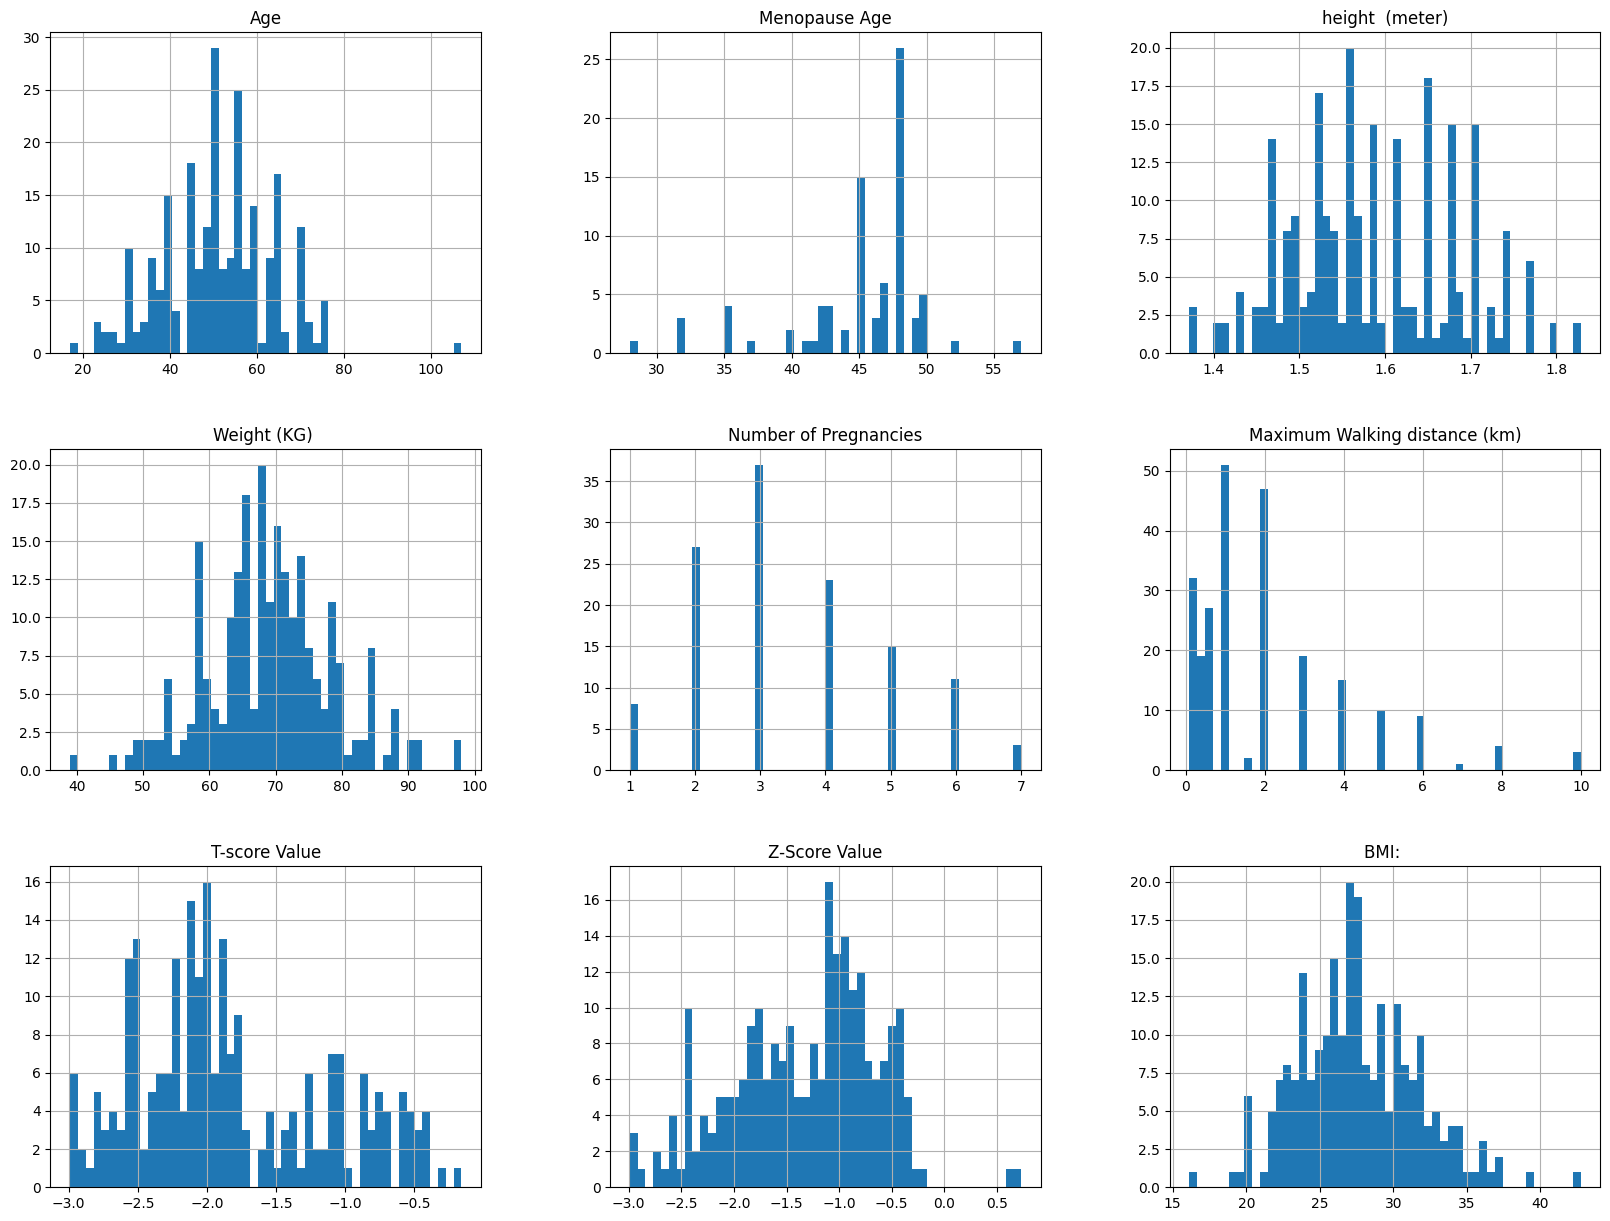

In [41]:
okx.hist(bins=50, figsize=(20, 15))
plt.show()